# c. Classification

**Step 1: Construction of 215 features**
   - **MD (1)**
   - **PSD (1)**
   - **VFI (1)**:  3 NaN, filled with average of 497
   - **Thresholds (54)**
   - **TD (54)**
   - **TD_NUM (52)**
   - **PD (0)**
   - **PD_NUM (52)**

**Step 2: Classification**
   - Decision Tree
   - KNN (K Nearest Neighbors)
   - SVM (linear)
   - SVM (polynomial)
   - **Random Forest (best)**
   - Logistic Regression
   
**Step 3: UMAP - reduce dimension to 2D**
   - for plotting the decision boundary

**Step 4: Evaluation UMAP**
   - use 2D-feature to refit classifiers
   
**Step 5: Plot the decision boundary**

# Step 1: Construction of 265 features (215 in fact)

In [1]:
print(3 + 54 + 54 + 52 + 52)
print(265 - 52 + 2)

# conda update anaconda   ### in jupyter notebook
# pip install -U numpy    ### in terminal

import numpy as np
print("The version of numpy is", np.__version__)

import pandas as pd
print("The version of pandas is", pd.__version__)

215
215
The version of numpy is 1.21.5
The version of pandas is 1.3.5


In [2]:
feature = pd.read_csv("opv_export_masked_add (md)_corrected (tdp, pdp).csv")
#### "1. Normal_manually delete.csv"
print("The shape of df is ", feature.shape)
feature.head()

The shape of df is  (500, 430)


,pdf_filename,opv_filename,maskedid,aedob_shift,aeexamdate_shift,eye,trial_rx_sphere,trial_rx_cylinder,trial_rx_axis,pupil_diameter,...,aeexamtime,test_type,vatype,fovealresult,clinicalnotes,sfstatus,sf,sfprob,cpsd,cpsdprob
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,1.2.276.0.75.2.5.80.25.3.190123133923519.93180...,VIP093528,04/18/1959,06/02/2011,L,2.25,-3.0,176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,1.2.276.0.75.2.5.80.25.3.190123133924241.93180...,VIP093528,04/18/1959,06/02/2011,R,3.00,-3.0,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1.2.276.0.75.2.5.80.25.3.190123134230637.93180...,VIP059015,12/08/1941,03/28/1998,L,0.00,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1.2.276.0.75.2.5.80.25.3.190123134233302.93180...,VIP059015,12/08/1941,03/28/1998,R,0.75,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,1.2.276.0.75.2.5.80.25.3.190123134640210.93180...,VIP099723,02/28/1949,09/30/2012,L,5.25,-1.5,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean "md", "psd" and "vfi"

In [3]:
feature[['md', 'psd', 'vfi']].mean()

md     -5.83286
psd     4.07294
vfi    84.17505
dtype: float64

In [4]:
print("The average of vfi coulumn is", feature['vfi'].mean())
print("Contains NaN?", feature['vfi'].isnull().values.any())
print("Number of NaN:", feature['vfi'].isnull().sum().sum())

The average of vfi coulumn is 84.17505030181087
Contains NaN? True
Number of NaN: 3


### Fill the 3 NaN in vfi with average

In [5]:
feature['vfi'] = feature['vfi'].fillna(feature['vfi'].mean())

print("The average of vfi coulumn is", feature['vfi'].mean())
print("Contains NaN?", feature['vfi'].isnull().values.any())
print("Number of NaN:", feature['vfi'].isnull().sum().sum())

The average of vfi coulumn is 84.17505030181087
Contains NaN? False
Number of NaN: 0


### thr, td, tdp, pd, pdp

In [6]:
thr = feature[feature.columns[40:116]]
print("The shape of thr before drop NaN is", thr.shape)
thr = thr.dropna(axis = 1)
print("The shape of thr after drop NaN is", thr.shape)

The shape of thr before drop NaN is (500, 76)
The shape of thr after drop NaN is (500, 54)


In [7]:
td = feature[feature.columns[116:192]]
print("The shape of td before drop NaN is", td.shape)
td = td.dropna(axis = 1)
print("The shape of td after drop NaN is", td.shape)

The shape of td before drop NaN is (500, 76)
The shape of td after drop NaN is (500, 54)


In [8]:
tdp = feature[feature.columns[192:268]]
print("The shape of tdp before drop NaN is", tdp.shape)
tdp = tdp.dropna(axis = 1)
print("The shape of tdp after drop NaN is", tdp.shape)

The shape of tdp before drop NaN is (500, 76)
The shape of tdp after drop NaN is (500, 52)


In [9]:
pd_d = feature[feature.columns[268:344]]
print("The shape of pd_d before drop NaN is", pd_d.shape)
pd_d = pd_d.dropna(axis = 1)
print("The shape of pd_d after drop NaN is", pd_d.shape)

The shape of pd_d before drop NaN is (500, 76)
The shape of pd_d after drop NaN is (500, 0)


In [10]:
pdp = feature[feature.columns[344:420]]
print("The shape of pdp before drop NaN is", pdp.shape)
pdp = pdp.dropna(axis = 1)
print("The shape of pdp after drop NaN is", pdp.shape)

The shape of pdp before drop NaN is (500, 76)
The shape of pdp after drop NaN is (500, 52)


In [11]:
concatenated_feature = pd.concat([feature[['md', 'psd', 'vfi']], thr, td, tdp, pdp], axis=1)
print("The shape of concatenated_feature is", concatenated_feature.shape)
concatenated_feature.head()

The shape of concatenated_feature is (500, 215)


,md,psd,vfi,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,n15_s15_thr,n9_s15_thr,n3_s15_thr,...,n15_i15_pdp,n9_i15_pdp,n3_i15_pdp,t3_i15_pdp,t9_i15_pdp,t15_i15_pdp,n9_i21_pdp,n3_i21_pdp,t3_i21_pdp,t9_i21_pdp
0,-2.20,4.04,96.0,28,28,26,29,25,29,31,...,4.0,4.0,0.0,0.0,2.0,1.0,4.0,3.0,1.0,0.0
1,-1.72,2.15,97.0,24,26,28,24,28,28,31,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
2,-1.77,2.18,99.0,29,27,24,26,28,29,29,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.51,1.96,98.0,25,25,24,24,30,27,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.76,1.80,98.0,26,22,23,23,25,26,24,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0


In [12]:
### check again
print("The shape of concatenated_feature is", concatenated_feature.shape)
print("The type of concatenated_feature is", type(concatenated_feature))
print("Contains NaN?", concatenated_feature.isnull().values.any())
print("Number of NaN:", concatenated_feature.isnull().sum().sum())

The shape of concatenated_feature is (500, 215)
The type of concatenated_feature is <class 'pandas.core.frame.DataFrame'>
Contains NaN? False
Number of NaN: 0


### Construct label, y

In [13]:
label = pd.read_csv("gradings_agreement_raw.csv")
label.head()

,pdf_filename,reliability,normal,gdefect1,gposition1,gdefect2,gposition2,gdefect3,gposition3,ngdefect1,ngposition1,ngdefect2,ngposition2,artifact1,artifact2
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0


In [14]:
Y = label["normal"]
print("The length of Y is", len(Y))
print("The type of Y is", type(Y))

The length of Y is 500
The type of Y is <class 'pandas.core.series.Series'>


# Step 2: Classification

In [15]:
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
#from sklearn.ensemble import AdaBoostClassifier

# 在terminal里run
# pip uninstall scikit-learn
# pip install scikit-learn==0.18.2

In [16]:
X = concatenated_feature.to_numpy()
Y = Y.to_numpy()
print("The shape of X is ", X.shape)
print("The shape of Y is ", Y.shape)

The shape of X is  (500, 215)
The shape of Y is  (500,)


In [17]:
concatenated_feature.describe()

,md,psd,vfi,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,n15_s15_thr,n9_s15_thr,n3_s15_thr,...,n15_i15_pdp,n9_i15_pdp,n3_i15_pdp,t3_i15_pdp,t9_i15_pdp,t15_i15_pdp,n9_i21_pdp,n3_i21_pdp,t3_i21_pdp,t9_i21_pdp
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,-5.832860,4.072940,84.175050,20.670000,21.266000,20.432000,20.566000,22.228000,23.428000,23.414000,...,0.728000,0.700000,0.836000,0.734000,0.49800,0.588000,0.756000,0.794000,0.70800,0.656000
std,8.934596,3.633445,26.715144,10.438536,10.186008,10.339981,10.393734,10.749843,10.366279,10.360564,...,1.404978,1.352649,1.439879,1.373688,1.17335,1.263903,1.337176,1.404104,1.32901,1.304249
min,-34.509998,0.970000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,-6.330000,1.630000,86.000000,18.000000,19.000000,19.000000,18.000000,20.750000,23.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,-2.060000,2.180000,97.000000,25.000000,25.000000,25.000000,24.000000,27.000000,28.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,-0.502500,5.525000,99.000000,28.000000,28.000000,28.000000,28.000000,29.000000,29.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.00000,0.000000
max,3.760000,16.010000,100.000000,48.000000,33.000000,38.000000,45.000000,45.000000,35.000000,39.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000


### Model Evaluation Matrics
Let's see what model evaluation matrics we have/can use.
- from scikit-learn package

In [18]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### Let's see if the data is balanced or not?
- "normal"

In [19]:
print("The number of normal is", Y.sum())
print("The proportion of normal is", Y.sum()/len(Y))

The number of normal is 185
The proportion of normal is 0.37


**Summary**: The label "normal" is **not balanced.**

### a. Decision Tree

In [23]:
dt1 = DecisionTreeClassifier (max_depth=2)
dt1_scores = cross_val_score (dt1, X, Y, cv = 10, scoring = 'roc_auc') 
[dt1_scores.mean(), dt1_scores.std()]

[0.9424623596962839, 0.04578194303033394]

In [24]:
dt1 = DecisionTreeClassifier (max_depth=2)
dt1_scores = cross_val_score (dt1, X, Y, cv = 10, scoring = 'f1') 
[dt1_scores.mean(), dt1_scores.std()]

[0.9082659177396021, 0.05234680973367745]

In [25]:
###### Accuracy!!!!
dt1 = DecisionTreeClassifier (max_depth=2)
dt1_scores = cross_val_score (dt1, X, Y, cv = 10, scoring = 'accuracy') 
[dt1_scores.mean(), dt1_scores.std()]

[0.932, 0.0370944739819828]

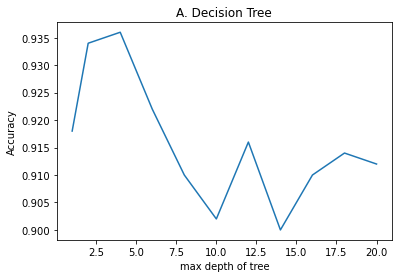

In [20]:
depth = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy = []

for i in range(len(depth)):
    dt = DecisionTreeClassifier (max_depth = depth[i])
    dt_scores = cross_val_score (dt, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(dt_scores.mean())
    
plt.plot(depth, accuracy)
plt.title("A. Decision Tree")
plt.xlabel("max depth of tree")
plt.ylabel("Accuracy")
plt.show()

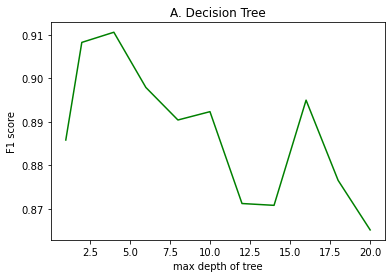

In [21]:
depth = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy = []

for i in range(len(depth)):
    dt = DecisionTreeClassifier (max_depth = depth[i])
    dt_scores = cross_val_score (dt, X, Y, cv = 10, scoring = 'f1')
    accuracy.append(dt_scores.mean())
    
plt.plot(depth, accuracy, color = "g")
plt.title("A. Decision Tree")
plt.xlabel("max depth of tree")
plt.ylabel("F1 score")
plt.show()

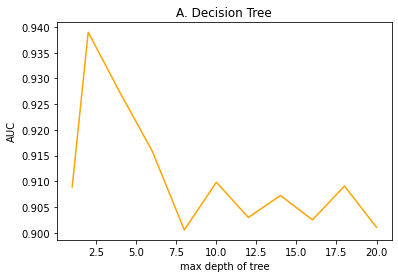

In [22]:
depth = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy = []

for i in range(len(depth)):
    dt = DecisionTreeClassifier (max_depth = depth[i])
    dt_scores = cross_val_score (dt, X, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(dt_scores.mean())
    
plt.plot(depth, accuracy, color = "orange")
plt.title("A. Decision Tree")
plt.xlabel("max depth of tree")
plt.ylabel("AUC")
plt.show()

### b. KNN classifier

In [29]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1_scores = cross_val_score(knn1, X, Y, cv=10, scoring = 'roc_auc') 
[knn1_scores.mean(), knn1_scores.std()]

[0.9238886236087531, 0.051880022683619735]

In [30]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1_scores = cross_val_score(knn1, X, Y, cv=10, scoring = 'f1') 
[knn1_scores.mean(), knn1_scores.std()]

[0.8478040678084525, 0.07906253273740295]

In [31]:
###### Accuracy!!!!
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1_scores = cross_val_score(knn1, X, Y, cv=10, scoring = 'accuracy') 
[knn1_scores.mean(), knn1_scores.std()]

[0.866, 0.07644605941446557]

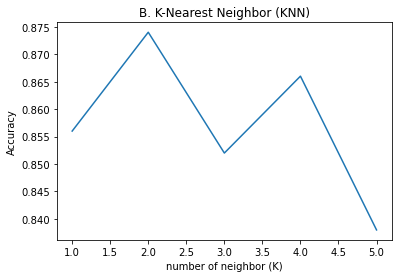

In [26]:
n_neighbors = [1,2,3,4,5]
accuracy = []

for i in range(len(n_neighbors)):
    knn = KNeighborsClassifier (n_neighbors = n_neighbors[i])
    knn_scores = cross_val_score (knn, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(knn_scores.mean())
    
plt.plot(n_neighbors, accuracy)
plt.title("B. K-Nearest Neighbor (KNN)")
plt.xlabel("number of neighbor (K)")
plt.ylabel("Accuracy")
plt.show()

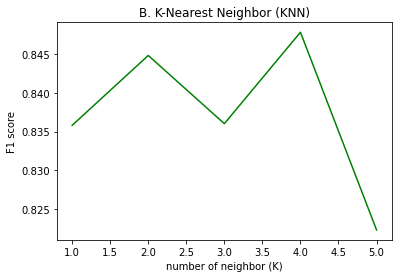

In [27]:
n_neighbors = [1,2,3,4,5]
accuracy = []

for i in range(len(n_neighbors)):
    knn = KNeighborsClassifier (n_neighbors = n_neighbors[i])
    knn_scores = cross_val_score (knn, X, Y, cv = 10, scoring = 'f1')
    accuracy.append(knn_scores.mean())
    
plt.plot(n_neighbors, accuracy, color = "g")
plt.title("B. K-Nearest Neighbor (KNN)")
plt.xlabel("number of neighbor (K)")
plt.ylabel("F1 score")
plt.show()

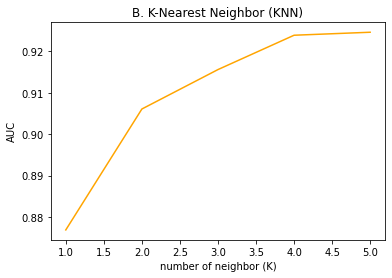

In [28]:
n_neighbors = [1,2,3,4,5]
accuracy = []

for i in range(len(n_neighbors)):
    knn = KNeighborsClassifier (n_neighbors = n_neighbors[i])
    knn_scores = cross_val_score (knn, X, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(knn_scores.mean())
    
plt.plot(n_neighbors, accuracy, color = "orange")
plt.title("B. K-Nearest Neighbor (KNN)")
plt.xlabel("number of neighbor (K)")
plt.ylabel("AUC")
plt.show()

### c. Support Vector Machines (Linear)

In [38]:
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, X, Y, cv = 10, 
                                     scoring = "roc_auc")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.9615836045085832, 0.03204762372340913]

In [39]:
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, X, Y, cv = 10, 
                                     scoring = "f1")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.8793259379569129, 0.04910036198504068]

In [40]:
###### Accuracy!!!!
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, X, Y, cv = 10, 
                                     scoring = "accuracy")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.908, 0.040199502484483556]

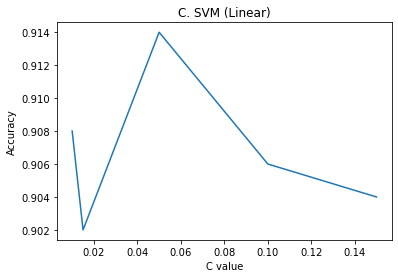

In [32]:
C = [0.01, 0.015, 0.05, 0.1, 0.15]
accuracy = []

for i in range(len(C)):
    svm_linear = SVC(C=C[i], kernel = 'linear')
    svm_scores = cross_val_score (svm_linear, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(svm_scores.mean())
    
plt.plot(C, accuracy)
plt.title("C. SVM (Linear)")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.show()

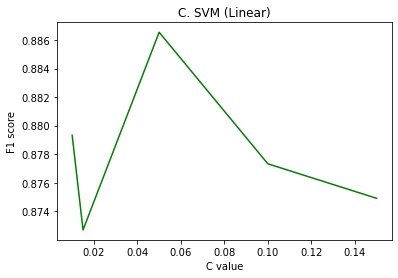

In [33]:
C = [0.01, 0.015, 0.05, 0.1, 0.15]
accuracy = []

for i in range(len(C)):
    svm_linear = SVC(C=C[i], kernel = 'linear')
    svm_scores = cross_val_score (svm_linear, X, Y, cv = 10, scoring = 'f1')
    accuracy.append(svm_scores.mean())
    
plt.plot(C, accuracy, color = "g")
plt.title("C. SVM (Linear)")
plt.xlabel("C value")
plt.ylabel("F1 score")
plt.show()

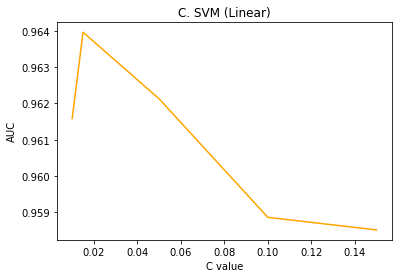

In [34]:
C = [0.01, 0.015, 0.05, 0.1, 0.15]
accuracy = []

for i in range(len(C)):
    svm_linear = SVC(C=C[i], kernel = 'linear')
    svm_scores = cross_val_score (svm_linear, X, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(svm_scores.mean())
    
plt.plot(C, accuracy, color = "orange")
plt.title("C. SVM (Linear)")
plt.xlabel("C value")
plt.ylabel("AUC")
plt.show()

### d. Support Vector Machines (Polynomial)

In [38]:
svm_poly = SVC(C=0.01, kernel = 'poly', degree = 3, gamma='auto')
svm_poly_scores = cross_val_score(svm_poly, X, Y, cv = 10, scoring = 'roc_auc')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.9576710172608942, 0.031580110215993835]

In [39]:
svm_poly = SVC(C=0.01, kernel = 'poly', degree = 3, gamma='auto')
svm_poly_scores = cross_val_score(svm_poly, X, Y, cv = 10, scoring = 'f1')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.8830762279780631, 0.039293172129953424]

In [40]:
svm_poly = SVC(C=0.01, kernel = 'poly', degree = 3, gamma='auto')
svm_poly_scores = cross_val_score(svm_poly, X, Y, cv = 10, scoring = 'accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.9120000000000001, 0.0312409987036266]

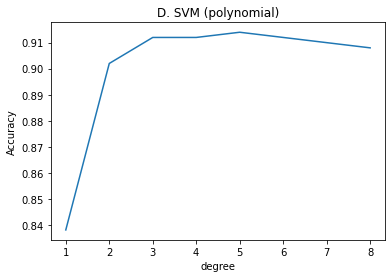

In [41]:
degree = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = []

for i in range(len(degree)):
    svm_linear = SVC(C=0.01, kernel = 'poly', degree = degree[i], gamma = 'auto')
    svm_scores = cross_val_score (svm_linear, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(svm_scores.mean())
    
plt.plot(degree, accuracy)
plt.title("D. SVM (polynomial)")
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.show()

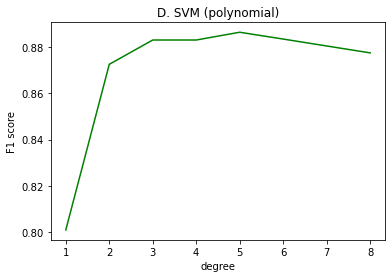

In [42]:
degree = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = []

for i in range(len(degree)):
    svm_linear = SVC(C=0.01, kernel = 'poly', degree = degree[i], gamma = 'auto')
    svm_scores = cross_val_score (svm_linear, X, Y, cv = 10, scoring = 'f1')
    accuracy.append(svm_scores.mean())
    
plt.plot(degree, accuracy, color = "g")
plt.title("D. SVM (polynomial)")
plt.xlabel("degree")
plt.ylabel("F1 score")
plt.show()

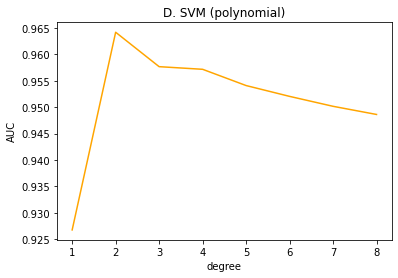

In [43]:
degree = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = []

for i in range(len(degree)):
    svm_linear = SVC(C=0.01, kernel = 'poly', degree = degree[i], gamma = 'auto')
    svm_scores = cross_val_score (svm_linear, X, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(svm_scores.mean())
    
plt.plot(degree, accuracy, color = "orange")
plt.title("D. SVM (polynomial)")
plt.xlabel("degree")
plt.ylabel("AUC")
plt.show()

### e. Random Forest

In [44]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 200, #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10, 
                            #min_samples_split = 0.01, min_samples_leaf = 0.01
                           )
# Evaluation - Cross Validation
rf_scores = cross_val_score(rf, X, Y, cv = 10, scoring = "roc_auc")
[rf_scores.mean(), rf_scores.std()]

[0.9789842128843615, 0.01848142388502001]

In [49]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 200, #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10, 
                            #min_samples_split = 0.01, min_samples_leaf = 0.01
                           )
# Evaluation - Cross Validation
rf_scores = cross_val_score(rf, X, Y, cv = 10, scoring = "f1")
[rf_scores.mean(), rf_scores.std()]

[0.8975271843692896, 0.06119992467347749]

In [50]:
###### Accuracy!!!!
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 200, #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10, 
                            #min_samples_split = 0.01, min_samples_leaf = 0.01
                           )
# Evaluation - Cross Validation
rf_scores = cross_val_score(rf, X, Y, cv = 10, scoring = "accuracy")
[rf_scores.mean(), rf_scores.std()]

[0.924, 0.0463033476111609]

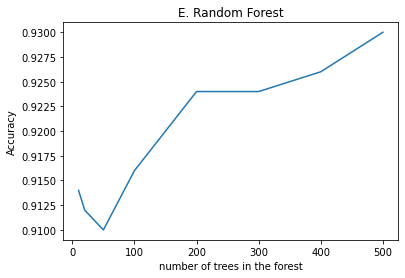

In [45]:
n_estimators = [10, 20, 50, 100, 200, 300, 400, 500]
accuracy = []

for i in range(len(n_estimators)):
    rf = RandomForestClassifier(n_estimators = n_estimators[i], #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10
                            #min_samples_split = 0.01, #min_samples_leaf = 0.01
                               )
    rf_scores = cross_val_score (rf, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(rf_scores.mean())
    
plt.plot(n_estimators, accuracy)
plt.title("E. Random Forest")
plt.xlabel("number of trees in the forest")
plt.ylabel("Accuracy")
plt.show()

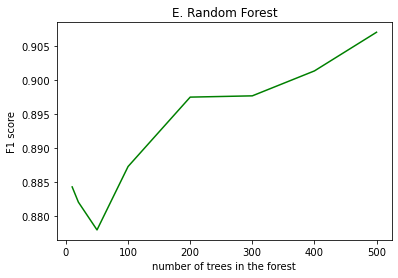

In [46]:
n_estimators = [10, 20, 50, 100, 200, 300, 400, 500]
accuracy = []

for i in range(len(n_estimators)):
    rf = RandomForestClassifier(n_estimators = n_estimators[i], #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10
                            #min_samples_split = 0.01, #min_samples_leaf = 0.01
                               )
    rf_scores = cross_val_score (rf, X, Y, cv = 10, scoring = 'f1')
    accuracy.append(rf_scores.mean())
    
plt.plot(n_estimators, accuracy, color = "g")
plt.title("E. Random Forest")
plt.xlabel("number of trees in the forest")
plt.ylabel("F1 score")
plt.show()

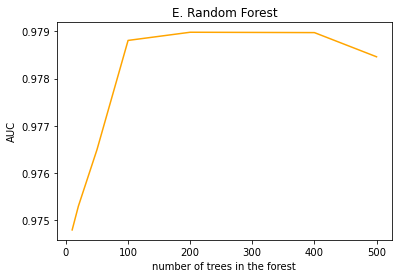

In [47]:
n_estimators = [10, 20, 50, 100, 200, 300, 400, 500]
accuracy = []

for i in range(len(n_estimators)):
    rf = RandomForestClassifier(n_estimators = n_estimators[i], #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10
                            #min_samples_split = 0.01, #min_samples_leaf = 0.01
                               )
    rf_scores = cross_val_score (rf, X, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(rf_scores.mean())
    
plt.plot(n_estimators, accuracy, color = "orange")
plt.title("E. Random Forest")
plt.xlabel("number of trees in the forest")
plt.ylabel("AUC")
plt.show()

### f. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [55]:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR = LogisticRegression(C=0.1, solver='liblinear') # random_state=0
LR_scores = cross_val_score(LR, X, Y, cv = 10, scoring = "roc_auc")
[LR_scores.mean(), LR_scores.std()]

[0.9651604650066027, 0.033212355774158576]

In [56]:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR = LogisticRegression(C=0.1, solver='liblinear') # random_state=0
LR_scores = cross_val_score(LR, X, Y, cv = 10, scoring = "f1")
[LR_scores.mean(), LR_scores.std()]

[0.8764413326332832, 0.05193642288523631]

In [57]:
###### Accuracy!!!!

#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR = LogisticRegression(C=0.1, solver='liblinear') # random_state=0
LR_scores = cross_val_score(LR, X, Y, cv = 10, scoring = "accuracy")
[LR_scores.mean(), LR_scores.std()]

[0.906, 0.04199999999999999]

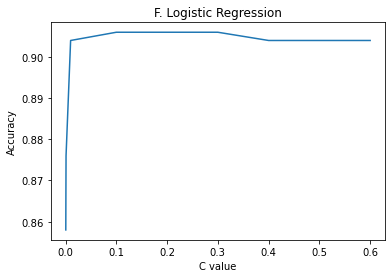

In [52]:
C = [0.0005, 0.0007, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
accuracy = []

for i in range(len(C)):
    LR = LogisticRegression(C=C[i], solver='liblinear') # random_state=0
    LR_scores = cross_val_score (LR, X, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(LR_scores.mean())
    
plt.plot(C, accuracy)
plt.title("F. Logistic Regression")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.show()

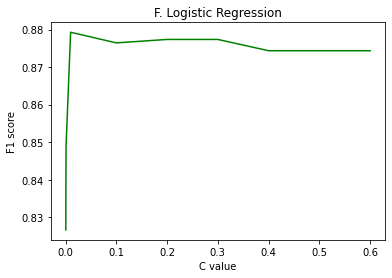

In [53]:
C = [0.0005, 0.0007, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
accuracy = []

for i in range(len(C)):
    LR = LogisticRegression(C=C[i], solver='liblinear') # random_state=0
    LR_scores = cross_val_score (LR, X, Y, cv = 10, scoring = 'f1')
    accuracy.append(LR_scores.mean())
    
plt.plot(C, accuracy, color = "g")
plt.title("F. Logistic Regression")
plt.xlabel("C value")
plt.ylabel("F1 score")
plt.show()

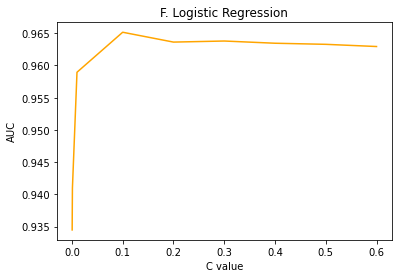

In [54]:
C = [0.0005, 0.0007, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
accuracy = []

for i in range(len(C)):
    LR = LogisticRegression(C=C[i], solver='liblinear') # random_state=0
    LR_scores = cross_val_score (LR, X, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(LR_scores.mean())
    
plt.plot(C, accuracy, color = "orange")
plt.title("F. Logistic Regression")
plt.xlabel("C value")
plt.ylabel("AUC")
plt.show()

# Step 3: UMAP - reduce dimension to 2D
- for plotting the decision boundary

In [58]:
# pip install umap-learn

# pip uninstall numba
# pip install numba==0.51   #### 需要把numba downgrade到更低的版本～

import numba
import sklearn

print("The version of numba is", numba.__version__)
print("The version of sklearn is", sklearn.__version__)

The version of numba is 0.51.0
The version of sklearn is 1.0.2


In [59]:
import umap
reducer = umap.UMAP()

In [60]:
embedding = reducer.fit_transform(X)
embedding.shape

(500, 2)

In [61]:
print("The type of embedding is ", type(embedding))
print("The type of Y is ", type(Y))
print("The shape of embedding is ", embedding.shape)
print("The shape of Y is ", Y.shape)

The type of embedding is  <class 'numpy.ndarray'>
The type of Y is  <class 'numpy.ndarray'>
The shape of embedding is  (500, 2)
The shape of Y is  (500,)


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'UMAP projection: Duke - 54 Thr features - label "normal"')

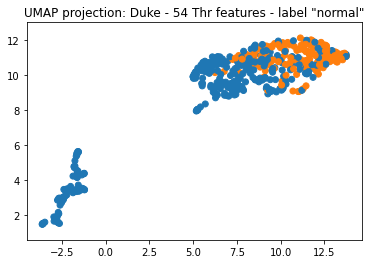

In [63]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in label.normal.map({0.0:0, 1.0:1})])  # df --> label
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection: Duke - 54 Thr features - label "normal"')

### Output a file to do clustering

In [74]:
feature["pdf_filename"].compare(label["pdf_filename"])

,self,other


In [69]:
embedding_df = pd.DataFrame(embedding, columns = ['X1','X2'])
type(embedding_df)

pandas.core.frame.DataFrame

In [68]:
type(label['normal'])

pandas.core.series.Series

In [76]:
clustering = pd.concat([label["pdf_filename"], embedding_df, label['normal']],axis = 1)
print("The shape of clustering is", clustering.shape)
clustering.head()

The shape of clustering is (500, 4)


,pdf_filename,X1,X2,normal
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,9.966893,9.228810,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,9.752504,9.033387,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,9.121086,10.243672,1
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,9.303379,10.575117,1
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,7.134477,9.970622,0


In [77]:
clustering.to_csv("/Users/yuhuicao/Desktop/1. Duke/6. Clustering.csv", index = False)

# Step 4: Evaluation UMAP
- use 2D-feature to refit classifiers

### a. Decision Tree

In [64]:
dt1 = DecisionTreeClassifier (max_depth=2)
dt1_scores = cross_val_score (dt1, embedding, Y, cv = 10, scoring = 'roc_auc') 
[dt1_scores.mean(), dt1_scores.std()]

[0.9138772460384834, 0.05419062872621272]

In [65]:
dt1 = DecisionTreeClassifier (max_depth=2)
dt1_scores = cross_val_score (dt1, embedding, Y, cv = 10, scoring = 'f1') 
[dt1_scores.mean(), dt1_scores.std()]

[0.7977283801674045, 0.08062825910026271]

In [66]:
###### Accuracy!!!!
dt1 = DecisionTreeClassifier (max_depth=2)
dt1_scores = cross_val_score (dt1, embedding, Y, cv = 10, scoring = 'accuracy') 
[dt1_scores.mean(), dt1_scores.std()]

[0.836, 0.07144228439796699]

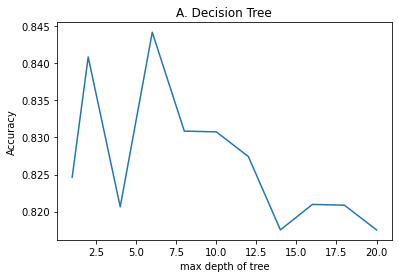

In [63]:
depth = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy = []

for i in range(len(depth)):
    dt = DecisionTreeClassifier (max_depth = depth[i])
    dt_scores = cross_val_score (dt, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(dt_scores.mean())
    
plt.plot(depth, accuracy)
plt.title("A. Decision Tree")
plt.xlabel("max depth of tree")
plt.ylabel("Accuracy")
plt.show()

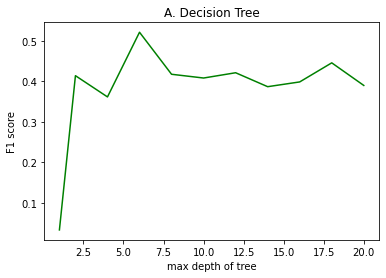

In [64]:
depth = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy = []

for i in range(len(depth)):
    dt = DecisionTreeClassifier (max_depth = depth[i])
    dt_scores = cross_val_score (dt, embedding, Y, cv = 10, scoring = 'f1')
    accuracy.append(dt_scores.mean())
    
plt.plot(depth, accuracy, color = "g")
plt.title("A. Decision Tree")
plt.xlabel("max depth of tree")
plt.ylabel("F1 score")
plt.show()

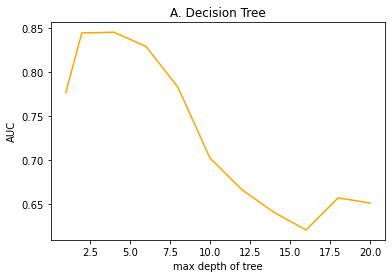

In [65]:
depth = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
accuracy = []

for i in range(len(depth)):
    dt = DecisionTreeClassifier (max_depth = depth[i])
    dt_scores = cross_val_score (dt, embedding, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(dt_scores.mean())
    
plt.plot(depth, accuracy, color = "orange")
plt.title("A. Decision Tree")
plt.xlabel("max depth of tree")
plt.ylabel("AUC")
plt.show()

### b. KNN classifier

In [67]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1_scores = cross_val_score(knn1, embedding, Y, cv=10, scoring = 'roc_auc') 
[knn1_scores.mean(), knn1_scores.std()]

[0.8704703416808149, 0.06600252739113]

In [68]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1_scores = cross_val_score(knn1, embedding, Y, cv=10, scoring = 'f1') 
[knn1_scores.mean(), knn1_scores.std()]

[0.7483907047905557, 0.0643138980664092]

In [69]:
###### Accuracy!!!!
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1_scores = cross_val_score(knn1, embedding, Y, cv=10, scoring = 'accuracy') 
[knn1_scores.mean(), knn1_scores.std()]

[0.8160000000000001, 0.057131427428342804]

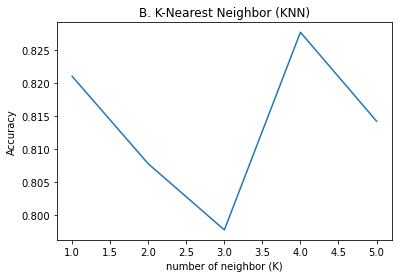

In [69]:
n_neighbors = [1,2,3,4,5]
accuracy = []

for i in range(len(n_neighbors)):
    knn = KNeighborsClassifier (n_neighbors = n_neighbors[i])
    knn_scores = cross_val_score (knn, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(knn_scores.mean())
    
plt.plot(n_neighbors, accuracy)
plt.title("B. K-Nearest Neighbor (KNN)")
plt.xlabel("number of neighbor (K)")
plt.ylabel("Accuracy")
plt.show()

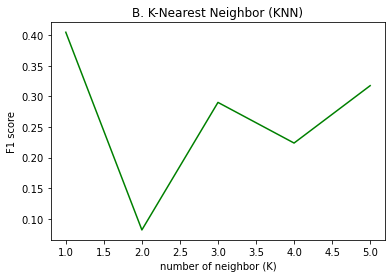

In [70]:
n_neighbors = [1,2,3,4,5]
accuracy = []

for i in range(len(n_neighbors)):
    knn = KNeighborsClassifier (n_neighbors = n_neighbors[i])
    knn_scores = cross_val_score (knn, embedding, Y, cv = 10, scoring = 'f1')
    accuracy.append(knn_scores.mean())
    
plt.plot(n_neighbors, accuracy, color = "g")
plt.title("B. K-Nearest Neighbor (KNN)")
plt.xlabel("number of neighbor (K)")
plt.ylabel("F1 score")
plt.show()

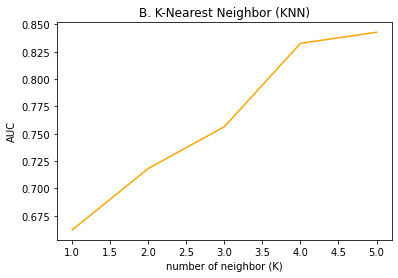

In [71]:
n_neighbors = [1,2,3,4,5]
accuracy = []

for i in range(len(n_neighbors)):
    knn = KNeighborsClassifier (n_neighbors = n_neighbors[i])
    knn_scores = cross_val_score (knn, embedding, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(knn_scores.mean())
    
plt.plot(n_neighbors, accuracy, color = "orange")
plt.title("B. K-Nearest Neighbor (KNN)")
plt.xlabel("number of neighbor (K)")
plt.ylabel("AUC")
plt.show()

### c. Support Vector Machines (Linear)

In [70]:
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, embedding, Y, cv = 10, 
                                     scoring = "roc_auc")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.9113209771741181, 0.06058297994962884]

In [71]:
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, embedding, Y, cv = 10, 
                                     scoring = "f1")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.7727325762831312, 0.09444535825507683]

In [72]:
###### Accuracy!!!!
svm_linear1 = SVC(C=0.01, kernel = 'linear')
svm_linear1_scores = cross_val_score(svm_linear1, embedding, Y, cv = 10, 
                                     scoring = "accuracy")
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.8280000000000001, 0.07959899496852958]

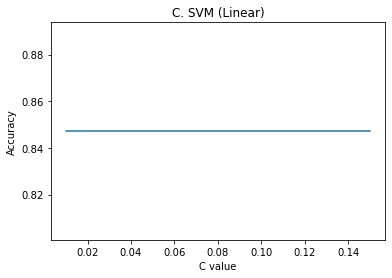

In [75]:
C = [0.01, 0.015, 0.05, 0.1, 0.15]
accuracy = []

for i in range(len(C)):
    svm_linear = SVC(C=C[i], kernel = 'linear')
    svm_scores = cross_val_score (svm_linear, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(svm_scores.mean())
    
plt.plot(C, accuracy)
plt.title("C. SVM (Linear)")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.show()

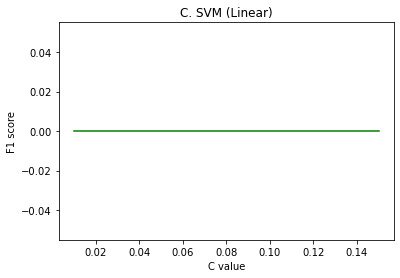

In [76]:
C = [0.01, 0.015, 0.05, 0.1, 0.15]
accuracy = []

for i in range(len(C)):
    svm_linear = SVC(C=C[i], kernel = 'linear')
    svm_scores = cross_val_score (svm_linear, embedding, Y, cv = 10, scoring = 'f1')
    accuracy.append(svm_scores.mean())
    
plt.plot(C, accuracy, color = "g")
plt.title("C. SVM (Linear)")
plt.xlabel("C value")
plt.ylabel("F1 score")
plt.show()

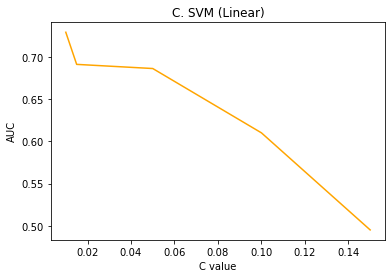

In [77]:
C = [0.01, 0.015, 0.05, 0.1, 0.15]
accuracy = []

for i in range(len(C)):
    svm_linear = SVC(C=C[i], kernel = 'linear')
    svm_scores = cross_val_score (svm_linear, embedding, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(svm_scores.mean())
    
plt.plot(C, accuracy, color = "orange")
plt.title("C. SVM (Linear)")
plt.xlabel("C value")
plt.ylabel("AUC")
plt.show()

### d. Support Vector Machines (Polynomial)

In [73]:
svm_poly = SVC(C=0.01, kernel = 'poly', degree = 2, gamma='auto')
svm_poly_scores = cross_val_score(svm_poly, embedding, Y, cv = 10, scoring = 'roc_auc')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.9151174306734579, 0.06031025925375384]

In [74]:
svm_poly = SVC(C=0.01, kernel = 'poly', degree = 2, gamma='auto')
svm_poly_scores = cross_val_score(svm_poly, embedding, Y, cv = 10, scoring = 'f1')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.7486083699793378, 0.09170769004496078]

In [75]:
svm_poly = SVC(C=0.01, kernel = 'poly', degree = 2, gamma='auto')
svm_poly_scores = cross_val_score(svm_poly, embedding, Y, cv = 10, scoring = 'accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.8180000000000002, 0.074]

In [81]:
degree = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = []

for i in range(len(degree)):
    svm_linear = SVC(C=0.01, kernel = 'poly', degree = degree[i], gamma = 'auto')
    svm_scores = cross_val_score (svm_linear, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(svm_scores.mean())
    
plt.plot(degree, accuracy)
plt.title("D. SVM (polynomial)")
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.show()

KeyboardInterrupt: 

In [82]:
degree = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = []

for i in range(len(degree)):
    svm_linear = SVC(C=0.01, kernel = 'poly', degree = degree[i], gamma = 'auto')
    svm_scores = cross_val_score (svm_linear, embedding, Y, cv = 10, scoring = 'f1')
    accuracy.append(svm_scores.mean())
    
plt.plot(degree, accuracy, color = "g")
plt.title("D. SVM (polynomial)")
plt.xlabel("degree")
plt.ylabel("F1 score")
plt.show()

KeyboardInterrupt: 

In [ ]:
degree = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = []

for i in range(len(degree)):
    svm_linear = SVC(C=0.01, kernel = 'poly', degree = degree[i], gamma = 'auto')
    svm_scores = cross_val_score (svm_linear, embedding, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(svm_scores.mean())
    
plt.plot(degree, accuracy, color = "orange")
plt.title("D. SVM (polynomial)")
plt.xlabel("degree")
plt.ylabel("AUC")
plt.show()

### e. Random Forest

In [76]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 200, #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10, 
                            #min_samples_split = 0.01, min_samples_leaf = 0.01
                           )
# Evaluation - Cross Validation
rf_scores = cross_val_score(rf, embedding, Y, cv = 10, scoring = "roc_auc")
[rf_scores.mean(), rf_scores.std()]

[0.9037767048670062, 0.06198077289925428]

In [78]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 200, #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10, 
                            #min_samples_split = 0.01, min_samples_leaf = 0.01
                           )
# Evaluation - Cross Validation
rf_scores = cross_val_score(rf, embedding, Y, cv = 10, scoring = "f1")
[rf_scores.mean(), rf_scores.std()]

[0.7919243415566946, 0.08366866656455171]

In [79]:
###### Accuracy!!!!
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 200, #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10, 
                            #min_samples_split = 0.01, min_samples_leaf = 0.01
                           )
# Evaluation - Cross Validation
rf_scores = cross_val_score(rf, embedding, Y, cv = 10, scoring = "accuracy")
[rf_scores.mean(), rf_scores.std()]

[0.8380000000000001, 0.07400000000000001]

In [ ]:
n_estimators = [10, 20, 50, 100, 200, 300, 400, 500]
accuracy = []

for i in range(len(n_estimators)):
    rf = RandomForestClassifier(n_estimators = n_estimators[i], #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10
                            #min_samples_split = 0.01, #min_samples_leaf = 0.01
                               )
    rf_scores = cross_val_score (rf, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(rf_scores.mean())
    
plt.plot(n_estimators, accuracy)
plt.title("E. Random Forest")
plt.xlabel("number of trees in the forest")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
n_estimators = [10, 20, 50, 100, 200, 300, 400, 500]
accuracy = []

for i in range(len(n_estimators)):
    rf = RandomForestClassifier(n_estimators = n_estimators[i], #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10
                            #min_samples_split = 0.01, #min_samples_leaf = 0.01
                               )
    rf_scores = cross_val_score (rf, embedding, Y, cv = 10, scoring = 'f1')
    accuracy.append(rf_scores.mean())
    
plt.plot(n_estimators, accuracy, color = "g")
plt.title("E. Random Forest")
plt.xlabel("number of trees in the forest")
plt.ylabel("F1 score")
plt.show()

In [ ]:
n_estimators = [10, 20, 50, 100, 200, 300, 400, 500]
accuracy = []

for i in range(len(n_estimators)):
    rf = RandomForestClassifier(n_estimators = n_estimators[i], #### number of trees in the forest
                            random_state = 42, 
                            max_features = 'sqrt', #bootstrap=True, 
                            max_depth=10
                            #min_samples_split = 0.01, #min_samples_leaf = 0.01
                               )
    rf_scores = cross_val_score (rf, embedding, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(rf_scores.mean())
    
plt.plot(n_estimators, accuracy, color = "orange")
plt.title("E. Random Forest")
plt.xlabel("number of trees in the forest")
plt.ylabel("AUC")
plt.show()

### f. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [81]:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR = LogisticRegression(C=0.2, solver='liblinear') # random_state=0
LR_scores = cross_val_score(LR, embedding, Y, cv = 10, scoring = "roc_auc")
[LR_scores.mean(), LR_scores.std()]

[0.9068530701754387, 0.0629691305232763]

In [82]:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR = LogisticRegression(C=0.2, solver='liblinear') # random_state=0
LR_scores = cross_val_score(LR, embedding, Y, cv = 10, scoring = "f1")
[LR_scores.mean(), LR_scores.std()]

[0.7558721794765979, 0.07556788969344497]

In [83]:
###### Accuracy!!!!

#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR = LogisticRegression(C=0.2, solver='liblinear') # random_state=0
LR_scores = cross_val_score(LR, embedding, Y, cv = 10, scoring = "accuracy")
[LR_scores.mean(), LR_scores.std()]

[0.8099999999999999, 0.06999999999999999]

In [ ]:
C = [0.0005, 0.0007, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
accuracy = []

for i in range(len(C)):
    LR = LogisticRegression(C=C[i], solver='liblinear') # random_state=0
    LR_scores = cross_val_score (LR, embedding, Y, cv = 10, scoring = 'accuracy')
    accuracy.append(LR_scores.mean())
    
plt.plot(C, accuracy)
plt.title("F. Logistic Regression")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
C = [0.0005, 0.0007, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
accuracy = []

for i in range(len(C)):
    LR = LogisticRegression(C=C[i], solver='liblinear') # random_state=0
    LR_scores = cross_val_score (LR, embedding, Y, cv = 10, scoring = 'f1')
    accuracy.append(LR_scores.mean())
    
plt.plot(C, accuracy, color = "g")
plt.title("F. Logistic Regression")
plt.xlabel("C value")
plt.ylabel("F1 score")
plt.show()

In [ ]:
C = [0.0005, 0.0007, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
accuracy = []

for i in range(len(C)):
    LR = LogisticRegression(C=C[i], solver='liblinear') # random_state=0
    LR_scores = cross_val_score (LR, embedding, Y, cv = 10, scoring = 'roc_auc')
    accuracy.append(LR_scores.mean())
    
plt.plot(C, accuracy, color = "orange")
plt.title("F. Logistic Regression")
plt.xlabel("C value")
plt.ylabel("AUC")
plt.show()

# Step 5: Plot the decision boundary